In [13]:
import utils.graph_utils

DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
#movie = 'Control'
#movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
movie = '130721_CCA60_RAW'
#movie ='280523 AM100 568'
#movie = 'control_1_050721'

MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from  skimage.filters import gaussian
from tqdm.notebook import trange, tqdm
import pandas as pd
from objects import movie_structure
from objects.movie_structure import gaussian_curvature, mean_curvature

import importlib
import seaborn as sns
#import scalar_mappable
from matplotlib.cm import ScalarMappable
#import gaussian_filter
from scipy.ndimage import gaussian_filter
from matplotlib.colors import Normalize
import  utils.graph_utils as graph_utils

In [3]:
surface = np.load(MOVIE_PATH + 'np/height.npy')
membrane = np.load(MOVIE_PATH + 'np/membrane.npy')
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy')

In [4]:
del gel


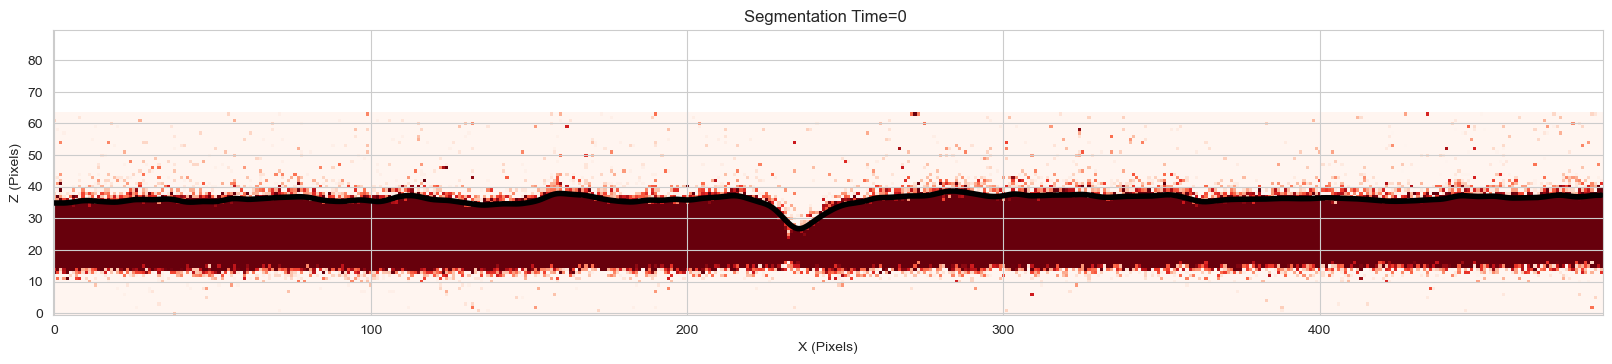

In [110]:
movie = '130721_CCA60_RAW'
MOVIE_PATH = DATA_PATH +  movie + '/'

surface = np.load(MOVIE_PATH + 'np/height.npy')
membrane = np.load(MOVIE_PATH + 'np/membrane.npy')
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy')
t = 0

y = 350
x1 = 10
x2 = 500
z1 = 0
z2 = 90
plot_sigma = 2.5
fig,ax1 = plt.subplots(1,1,figsize=(20,20))
h = surface[t]
m = membrane[t]+3
#sm = ScalarMappable(cmap='coolwarm')
#sm.set_array(h)
#cbar = plt.colorbar(sm)
img = gel[t,z1:z2,y,x1:x2].copy()
pixel_size_x = 0.168
pixel_size_y = 0.270

'''up = gaussian_filter(h[y,x1:x2 ],sigma = plot_sigma ).astype(int)
down =gaussian_filter(m[y,x1:x2 ],sigma = plot_sigma ).astype(int)
background_mask = np.zeros((z2-z1,x2-x1), dtype=bool)

for i in range(len(up)):
    background_mask[up[i]:,i] = True
    background_mask[:down[i],i] = True
img[background_mask] = np.nan'''
#img[~background_mask] = 1
# Define extent: left, right, bottom, top
#extent = [0, img.shape[1] * pixel_size_x, 0, img.shape[0] * pixel_size_y]

ax1.imshow(img,origin='lower', cmap='Reds', vmin= 1.11, vmax =1.25)#,extent=extent)
ax1.set_xlabel('X (Pixels)')
ax1.set_ylabel('Z (Pixels)')
ax1.plot(gaussian_filter(h[y,x1:x2 ],sigma = plot_sigma ), 'black', lw= 4 ,linestyle='-')
#ax1.plot(gaussian_filter(m[y,x1:x2 ],sigma = plot_sigma ), 'w', linestyle='-')

#im= ax2.imshow(h, origin='lower', cmap='coolwarm')

#ax2.set_xlabel('X (Pixels)')
#ax2.set_ylabel('Y (Pixels)')
#ax2.set_title('Surface computed \n y=%d'%y)
plt.title('Segmentation Time=%d ' % t)
# Connect the key press event to the on_key function
#plt.axis('off')
#plt.title("")
#extent = ax1.get_window_extent().transformed(plt.gcf().dpi_scale_trans.inverted())
plt.savefig(r'\\132.72.218.248\Yuval_and_Shachar\evolution paper\\' + '%s_sideview_t%dy%d+membrane.png'%(movie,t,y))#, bbox_inches=extent)
plt.show()


## <span color='red'> TOP VIEW

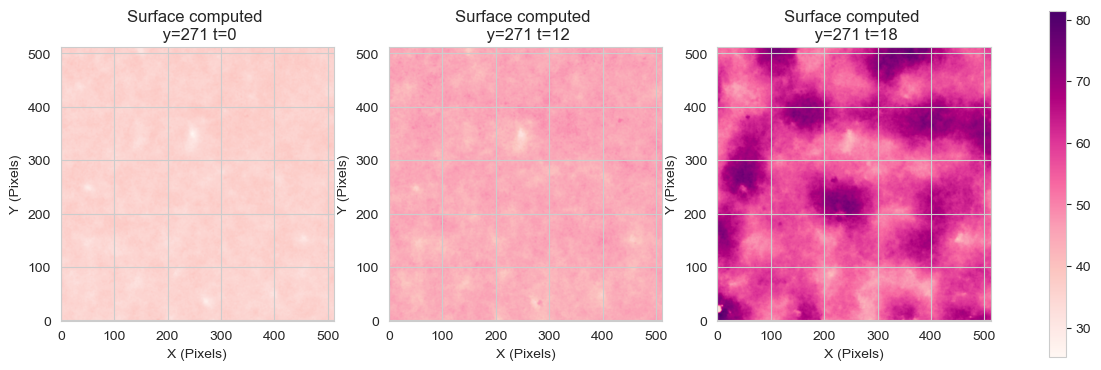

In [17]:

T =[0,12,18]
Y = [ 271,271,271]
ty = zip(T,Y)
vmin = np.nanmin([np.nanmin(surface[t]) for t in T])
vmax = np.nanmax([np.nanmax(surface[t]) for t in T])
fig, axes = plt.subplots(1,3,figsize=(15,15))

for i,(t,y) in enumerate(ty):
    im= axes[i].imshow(surface[t], origin='lower', cmap='RdPu', vmax = vmax, vmin = vmin )
    #ax2.hlines(y=y, xmin=0, xmax=h.shape[0], color='b')

    axes[i].set_xlabel('X (Pixels)')
    axes[i].set_ylabel('Y (Pixels)')
    axes[i].set_title('Surface computed \n y=%d t=%d'%(y,t))
    
plt.colorbar(im, ax=axes.ravel().tolist(), shrink=0.3)

        
    # Show the plot
plt.show()


## <span color='red'> Intensity on surface membrane and motors

# preparation for geting values of intensity on membrane and surface

In [14]:
channel_name= ['Gel', 'Motors']
manifold_name = ['Membrane', 'Surface']
channel = 0
manifold = 0
membrane = np.load(MOVIE_PATH + 'np/membrane.npy')
surface = np.load(MOVIE_PATH + 'np/height.npy')
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy')
membrane_mask = ~np.isnan(membrane)
surface_mask = ~np.isnan(surface)

membrane[np.isnan(membrane)] = 0
surface[np.isnan(surface)] = 0
membrane = membrane.astype(int)
surface = surface.astype(int)
'''def values_3d(data, manifold):
    index_a = np.arange(data.shape[0])[:, np.newaxis, np.newaxis]
    index_c = np.arange(data.shape[2])[:, np.newaxis]
    index_d = np.arange(data.shape[3])


# Use advanced indexing to get the required values from `motors`
    return data[index_a, manifold, index_c, index_d]'''


'def values_3d(data, manifold):\n    index_a = np.arange(data.shape[0])[:, np.newaxis, np.newaxis]\n    index_c = np.arange(data.shape[2])[:, np.newaxis]\n    index_d = np.arange(data.shape[3])\n\n\n# Use advanced indexing to get the required values from `motors`\n    return data[index_a, manifold, index_c, index_d]'

# 3d plot of surface and membrane intensity motors and gels

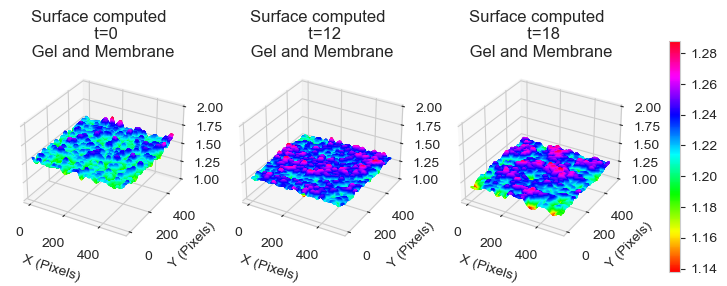

In [18]:
import numpy as np
import matplotlib.pyplot as plt
T =[0,12,18]
xx = np.arange(0, surface.shape[1])
yy = np.arange(0, surface.shape[2])
X, Y = np.meshgrid(xx, yy)

# Create random 3D array with dimensions (time, x, y)

for m_index, manifold in enumerate([surface-2]):#membrane+3, 
    for e_index ,experiment_data in enumerate([gel]):
        
        data = graph_utils.values_3d(experiment_data, manifold)
        #data [~np.bitwise_and(membrane_mask, surface_mask)]= np.nan
        vmin = np.nanmin([np.nanmin(data[t]) for t in T])
        vmax = np.nanmax([np.nanmax(data[t]) for t in T])

        label = channel_name[e_index] + ' and ' + manifold_name[m_index ]

        # Initialize the plot
        fig, axes = plt.subplots(1,len(T), figsize=(10, 10), subplot_kw={'projection': '3d'})
        

        for i,t in enumerate(T):
            Z = gaussian_filter(data[t],sigma =7)
            norm = Normalize(vmin=np.min(Z), vmax=np.max(Z))
            colors = plt.cm.hsv(norm(Z))
            axes[i].set_xlabel('X (Pixels)')
            axes[i].set_ylabel('Y (Pixels)')
            axes[i].set_title('Surface computed \n  t=%d\n %s'%(t,label))
            im = axes[i].plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=colors, shade=False)#, vmin= vmin, vmax =vmax)
            axes[i].set_zlim(1, 2)
        #plt.colorbar(im, ax=axes.ravel().tolist(), shrink=0.3)
        #plt.colorbar(im, ax=axes.ravel().tolist(), shrink=0.3)
        mappable = ScalarMappable(norm=norm, cmap=plt.cm.hsv)
        mappable.set_array(data[T])  # Set the data array

        # Now, create the colorbar
        plt.colorbar(mappable, ax=axes.ravel().tolist(), shrink=0.3)

        plt.show()


# stat data

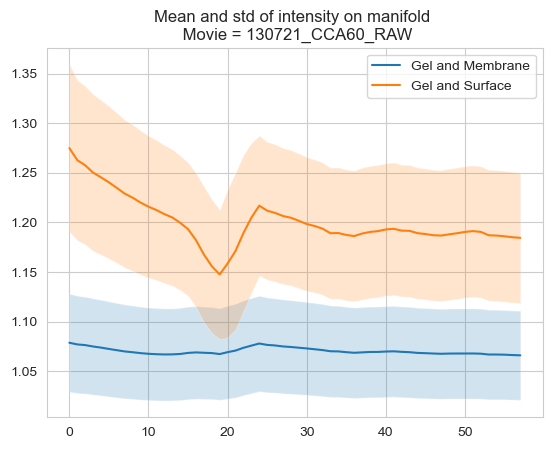

In [22]:
manifold_width_range = [-2,-1,0,1,2]
for m_index, manifold in enumerate([membrane,surface]): 
    for e_index ,experiment_data in enumerate([gel]):
        mean_list = []
        std_list = []
        data = graph_utils.values_3d(experiment_data, manifold)
        for t in range(0- manifold_width_range[0],len(experiment_data) - manifold_width_range[-1]):
            mean_list.append(np.nanmean([data[t + offset] for offset in manifold_width_range]))
            std_list.append(np.nanstd([data[t + offset] for offset in manifold_width_range]))
        plt.plot(mean_list, label = channel_name[e_index] + ' and ' + manifold_name[m_index ])
        plt.fill_between(np.arange(len(mean_list)), np.array(mean_list) - np.array(std_list), np.array(mean_list) + np.array(std_list), alpha=0.2)
        
plt.legend()
plt.title('Mean and std of intensity on manifold \n Movie = %s'%movie)
plt.show()

          

In [16]:
#reload graph_utils
importlib.reload(utils.graph_utils)   

<module 'utils.graph_utils' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\utils\\graph_utils.py'>

In [ ]:
len(np.isnan(data[0])

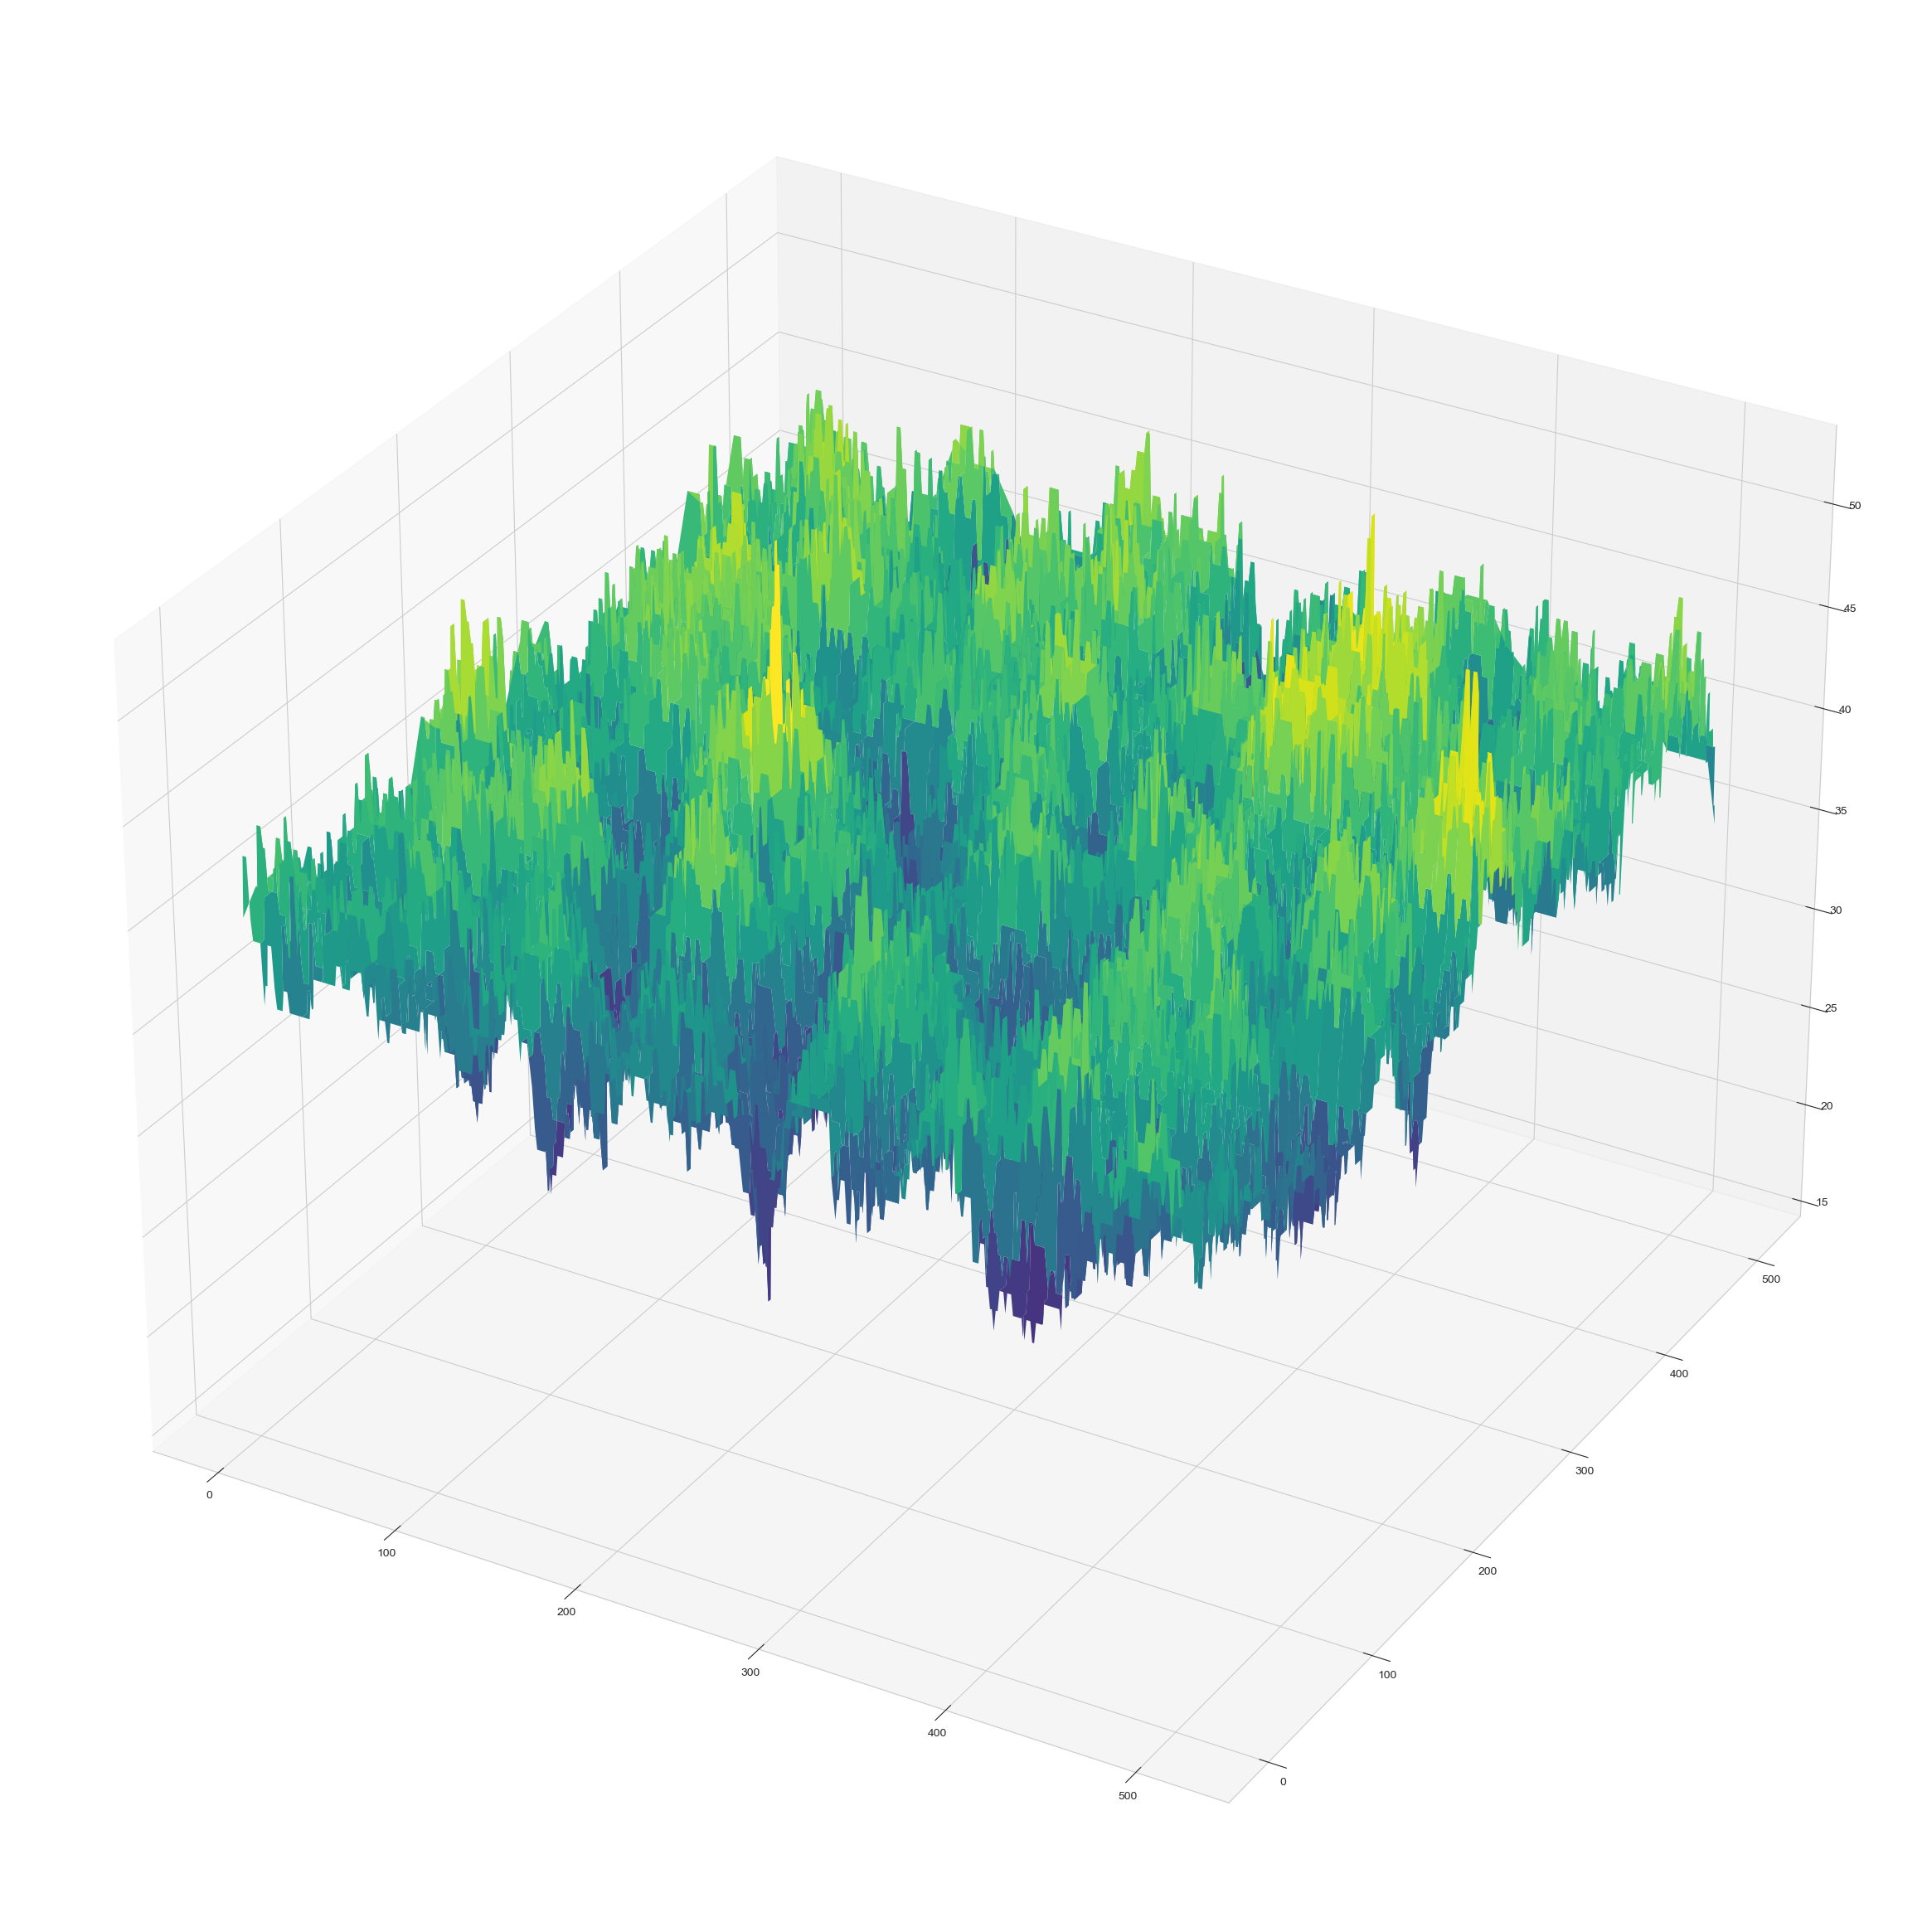

In [23]:
x = np.arange(0, surface.shape[1])
y = np.arange(0, surface.shape[2])
X, Y = np.meshgrid(x, y)
fig =  plt.figure(figsize=(30, 30))
ax = plt.subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, h, cmap='viridis', edgecolor='none')


In [101]:
plt.savefig(r'\\132.72.218.248\Yuval_and_Shachar\evolution paper\\' + '%s_sideview_t%dy%d+membrane.png'%(movie,t,y))#, bbox_inches=extent)
plt.show()



<Figure size 640x480 with 0 Axes>